Welcome to Jupyter (previously ipython notebook).  This will let you write and run code interactively before your python install actually works.  

Our goal today is to show you some of the neat things that Python does.  We will go into depth about how and why things worked, today is focused on convincing you that Python has features that you'll find useful.

So let's start with a simple exercise: writing numbers to the console.  Type ctrl-enter in the cell below to run it, displaying the results.

In [1]:
# Magic we need at the top of every notebook 
%matplotlib inline 

print "Hello world."

print 1

print [1,2,4,8,16]

a = [1, 3, 9, 27]
print a

print "See, I'm live"

Hello world.
1
[1, 2, 4, 8, 16]
[1, 3, 9, 27]
See, I'm live


Okay, not the coolest thing.  Especially when we think about having metric tons of data to see, we'd rather visualize something more like a graph.

To do that, we need to use a package.  Packages are like plug-ins for python: they give it additional functionality so that you can make it do the custom tasks that interest you.  

The first one we'll import is matplotlib, which is a plotting library that's supposed to mimic MATLAB.

We give matplotlib an easily typed name, plt, and then call the simplest plotting funciton, plot.

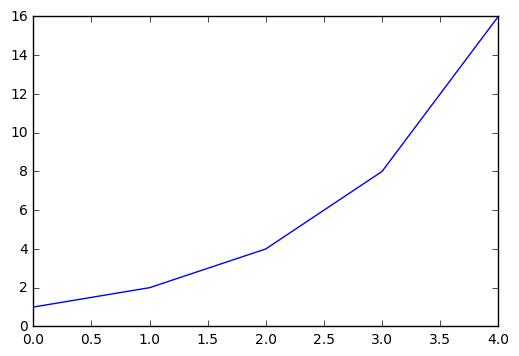

In [5]:
import matplotlib.pyplot as plt

plt.plot([1,2,4,8,16])
plt.show()

Running plot without show() works but leaves an ugly output line.  Let's comment out the show command, i.e. tell python to ignore it without just deleting the line, and rerun the cell.

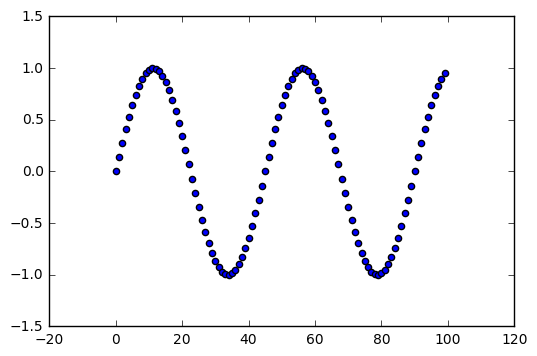

In [6]:
import numpy as np # another standard, simple name for this common library

x = np.array(range(100))
plt.scatter(x, np.sin(2*np.pi*x/45))
plt.show()

We can do some fancier things, like plotting more than one series, adding a title, labeling axes, and adding a legend:

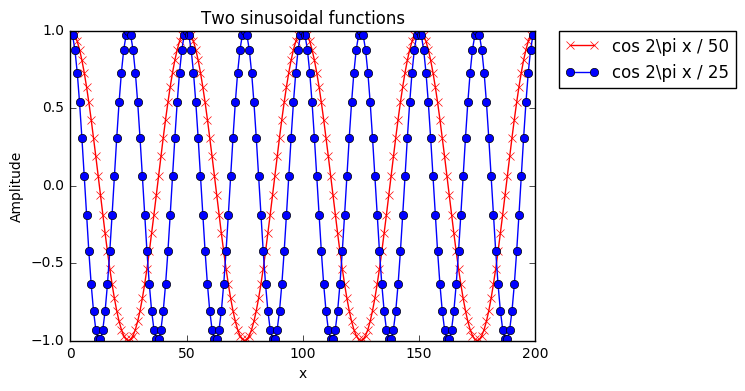

In [7]:
x = np.array(range(200))
y1 = np.cos(2*np.pi*x/50)
y2 = np.cos(2*np.pi*x/25)
plt.plot(x, y1, c='r', marker = 'x', ls='-', label='cos 2\pi x / 50')
plt.plot(x, y2, c='b', marker = 'o', ls='-', label='cos 2\pi x / 25')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Two sinusoidal functions')
plt.ylabel('Amplitude')
plt.xlabel('x')
plt.show()

We also want to load in our own data.  We can do this from csv files, from excel files, and even directly from SQL queries.  This week we're just going to use a csv file that I have laying around.  First, let's see what the file contains.

In [8]:
filename = "./sample_data/test_data.csv"
    
# First, let's see what the file contains.
with open(filename, 'r') as infile:
    for line in infile:
        print ", ".join(line.split(',')),



category, feature_one, feature_two, feature_three, noise, value
1, 6.2, 1.3, 1.9, 0.03, 9.43
1, 6.3, 1.8, 1.6, 0.05, 9.75
1, 5.5, 1.4, 1.4, -0.02, 8.28
2, 6.3, 1.4, 1.7, -0.05, 9.35
2, 6.5, 2, 1.6, 0.06, 10.16
1, 6.7, 1.9, 1.4, 0.03, 10.03
2, 6.3, 1.2, 1.4, -0.07, 8.83
1, 5.2, 1.1, 1.3, -0.04, 7.56
3, 5.5, 1.9, 1.4, 0.04, 8.84
4, 5.6, 1.8, 1.1, 0.04, 8.54
2, 7.5, 1.7, 1.2, -0.01, 10.39
3, 6.7, 1.7, 1.6, 0.05, 10.05
4, 7.8, 1.4, 1.9, -0.01, 11.09
4, 5.5, 1.3, 1.3, 0.04, 8.14
3, 6.7, 1.6, 1.7, 0.05, 10.05
2, 7, 1.1, 1.6, -0.09, 9.61
1, 7.8, 1.5, 1.7, 0.03, 11.03
3, 6.6, 1.1, 1.7, -0.09, 9.31
2, 6.7, 1.1, 1.6, -0.07, 9.33
4, 7.8, 1.4, 1.7, -0.06, 10.84
2, 5.7, 1, 1.6, 0.08, 8.38
3, 5.2, 1.4, 1.9, -0.03, 8.47
1, 6.4, 1.9, 1.1, 0.08, 9.48
4, 7.9, 1, 1.7, 0.03, 10.63
3, 6.4, 1.3, 1.5, -0.06, 9.14


As with most new bits of functionality, we need to use a library to let us do cool things.  The library for dealing with tabular data is the "Python Data Analysis Library," and it's abbreviated pandas.

In [1]:
import pandas as pd

filename = "./sample_data/test_data.csv"
df = pd.read_csv(filename) # load file into a pandas DataFrame object
print df.head() # Just show the first few rows of a dataframe

print '\nWe can access columns of a dataframe easily.'
print df['category'].head()

print '\nWe can add columns together, too.'
print (df['category'] + df['feature_one']).head()

   category  feature_one  feature_two  feature_three  noise  value
0         1          6.2          1.3            1.9   0.03   9.43
1         1          6.3          1.8            1.6   0.05   9.75
2         1          5.5          1.4            1.4  -0.02   8.28
3         2          6.3          1.4            1.7  -0.05   9.35
4         2          6.5          2.0            1.6   0.06  10.16

We can access columns of a dataframe easily.
0    1
1    1
2    1
3    2
4    2
Name: category, dtype: int64

We can add columns together, too.
0    7.2
1    7.3
2    6.5
3    8.3
4    8.5
dtype: float64


We can filter the data and only show rows matching certain criteria.

In [4]:
print '\nAnd we can filter on simple conditions'
print df[df['category'] ==4]

print '\nOr complex conditions'
print df[(df['category'] == 1) | (df['feature_two'] * df['feature_three'] < 1.8)]


And we can filter on simple conditions
    category  feature_one  feature_two  feature_three  noise  value
9          4          5.6          1.8            1.1   0.04   8.54
12         4          7.8          1.4            1.9  -0.01  11.09
13         4          5.5          1.3            1.3   0.04   8.14
19         4          7.8          1.4            1.7  -0.06  10.84
23         4          7.9          1.0            1.7   0.03  10.63

Or complex conditions
    category  feature_one  feature_two  feature_three  noise  value
0          1          6.2          1.3            1.9   0.03   9.43
1          1          6.3          1.8            1.6   0.05   9.75
2          1          5.5          1.4            1.4  -0.02   8.28
5          1          6.7          1.9            1.4   0.03  10.03
6          2          6.3          1.2            1.4  -0.07   8.83
7          1          5.2          1.1            1.3  -0.04   7.56
13         4          5.5          1.3            1.3

We can even perform functions on each group of data with matching entries in a column.

In [5]:
print '\nWe can group rows that contain the same value, and perform functions on each group.'
print df.groupby('category').mean()


print '\nWe can even write custom functions for each group.'
def custom_function(group):
    return pd.Series({'mean_value': group.value.mean(), 'num_entries': len(group)})

print df.groupby('category').apply(custom_function)


We can group rows that contain the same value, and perform functions on each group.
          feature_one  feature_two  feature_three     noise     value
category                                                             
1            6.300000     1.557143       1.485714  0.022857  9.365714
2            6.571429     1.357143       1.528571 -0.021429  9.435714
3            6.183333     1.500000       1.633333 -0.006667  9.310000
4            6.920000     1.380000       1.540000  0.008000  9.848000

We can even write custom functions for each group.
          mean_value  num_entries
category                         
1           9.365714          7.0
2           9.435714          7.0
3           9.310000          6.0
4           9.848000          5.0


But who wants to stare at numbers?  How about presentation ready graphics?

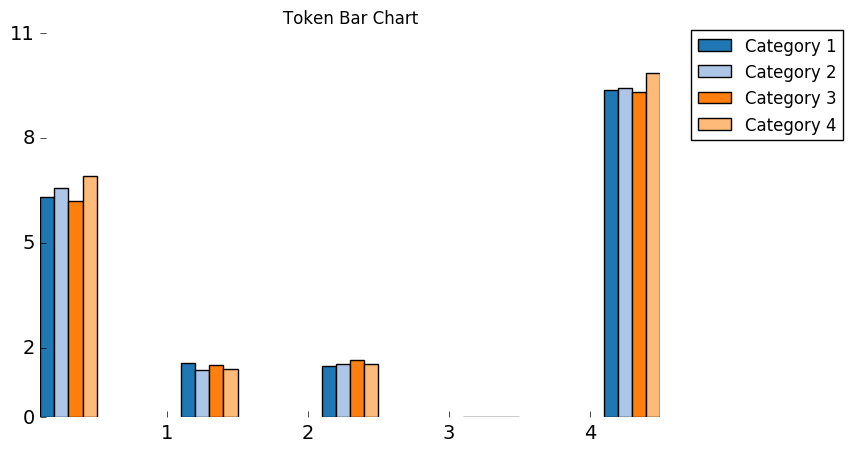

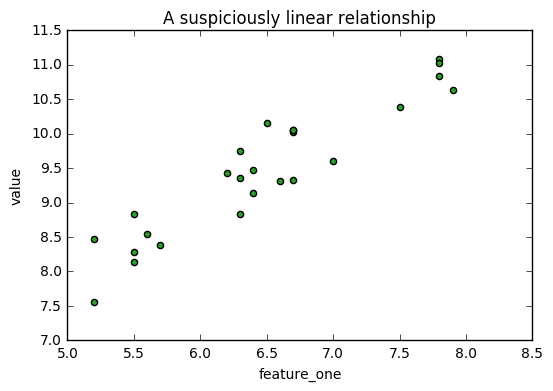

In [57]:
filename = "./sample_data/test_data.csv"
df = pd.read_csv(filename) # load file into a pandas DataFrame object

# Groupby operations on dataframes
averages = df.groupby('category').mean()
# Plotting some bars

# Make bar plots 
colors = [map(lambda x: x/256.0,  trip) for trip in [ (31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] ]
color_iter = iter(colors)

# Messing with plotting customizations.
plt.figure(figsize=(8, 5))  
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)   
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 

plt.yticks(map(int, np.linspace(0, max(df.max()), 5)), fontsize=14)   
x_ticks = range(len(df.columns))
plt.xticks(x_ticks, map(str, x_ticks), fontsize=14)   
for i, row in averages.iterrows():            
    heights = row.tolist()
    x_axis = [0.1*i + j for j in range(len(heights))]
    f = plt.bar(x_axis, heights, width = 0.1, color=color_iter.next(), label='Category {}'.format(i)) 
plt.ylim(0, max(df.max())) 
plt.title("Token Bar Chart".format(i))
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

df.plot(x='feature_one', y='value', kind='scatter', color=color_iter.next())
plt.title('A suspiciously linear relationship')

We can find the fit line from the last plot using ordinary least squares.

In [15]:
from statsmodels.formula.api import ols

formula = 'value ~ feature_one'
model = ols(formula, df).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     157.6
Date:                Mon, 16 Jan 2017   Prob (F-statistic):           8.95e-12
Time:                        15:27:49   Log-Likelihood:                -7.8588
No. Observations:                  25   AIC:                             19.72
Df Residuals:                      23   BIC:                             22.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       2.5570      0.555      4.608      

Of course we can easily plot the model output.

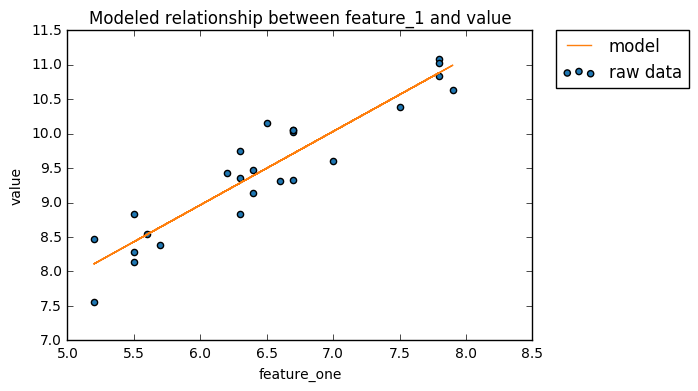

In [58]:
df.plot(x='feature_one', y='value', kind='scatter', label='raw data', c=colors[0])
plt.plot(df.feature_one, model.predict(), label='model', c=colors[2])
plt.title('Modeled relationship between feature_1 and value')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)